<a href="https://colab.research.google.com/github/LiamJWong/Datasets/blob/master/lab1-binary-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1: Binary image classifier

## 1. Setup
Install fastbook and setup Google drive connection.

In [ ]:
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 8.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

Import necessary libraries

In [ ]:
from fastbook import *

## 2. Download images 
Use Azure image search or DuckDuckGo to download 150 images of each class. Save images to Google drive.

### 2.1 Try it out
Similar to the lecture notebook, try out your query and plot a few of the resulting images to verify that your search returns sensible images.

In [ ]:
urls_lotus = search_images_ddg('lotus elise', max_images=17) #decreased for processing time, 150 for google drive download
len(urls_lotus),urls_lotus[0]

(17,
 'https://www.supercars.net/blog/wp-content/uploads/2020/05/Lotus-Elise-Classic-Heritage-04.jpg')

In [ ]:
urls_tesla = search_images_ddg('tesla_roadster', max_images=17)
len(urls_tesla),urls_tesla[0]

(17,
 'https://wonderfulengineering.com/wp-content/uploads/2018/10/roadster1.jpg')

0: https://www.supercars.net/blog/wp-content/uploads/2020/05/Lotus-Elise-Classic-Heritage-04.jpg
1: https://pictures.topspeed.com/IMG/jpg/201109/lotus-elise-s-13.jpg
2: https://ag-spots-2013.o.auroraobjects.eu/2013/07/28/lotus-elise-s2-111r-c806628072013091419_10.jpg
3: https://i.redd.it/x49s87ewjxx01.jpg
4: https://pictures.topspeed.com/IMG/crop/200807/lotus-eco-elise-1-1_1600x0w.jpg
5: https://pictures.topspeed.com/IMG/jpg/201508/lotus-elise-will-ret.jpg
6: https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/2011_Lotus_Elise_SC_--_2012_DC.JPG/1200px-2011_Lotus_Elise_SC_--_2012_DC.JPG
403 Client Error: Forbidden. Please comply with the User-Agent policy: https://meta.wikimedia.org/wiki/User-Agent_policy for url: https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/2011_Lotus_Elise_SC_--_2012_DC.JPG/1200px-2011_Lotus_Elise_SC_--_2012_DC.JPG
7: https://s1.cdn.autoevolution.com/images/news/gallery/lotus-elise-named-slowest-depreciating-sports-cars_1.jpg
8: https://bespokes.co.

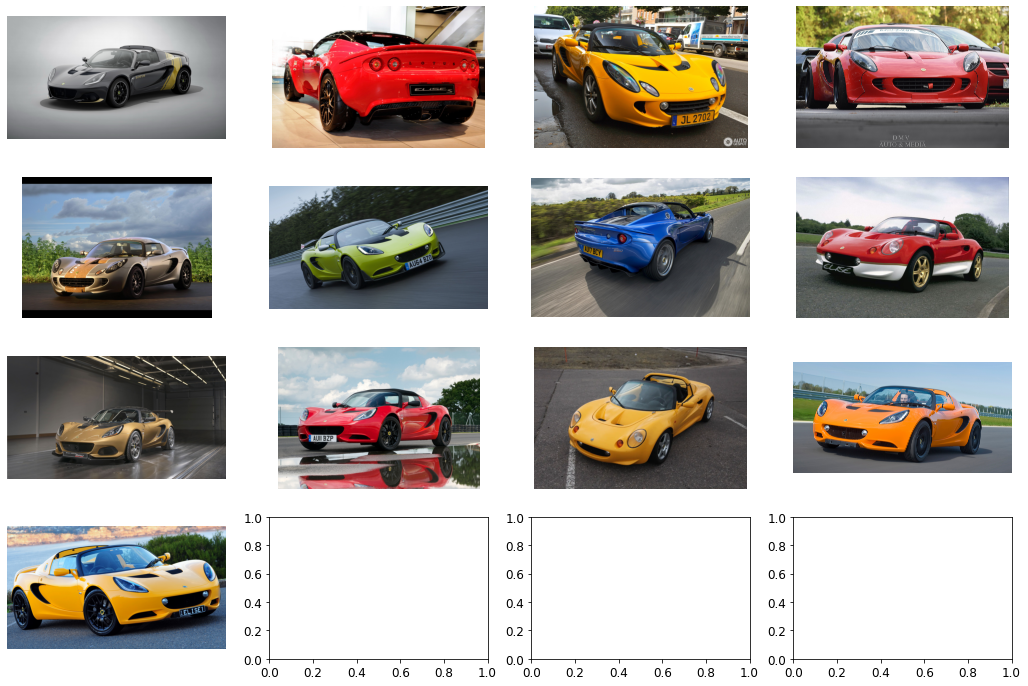

In [ ]:
f, axes = plt.subplots(4, 4, figsize=(18,12))
axes = axes.flatten()
ax_i = 0
img_i = 0
while ax_i < len(axes) and img_i < len(urls_lotus):
  try:
    url = urls_lotus[img_i]
    print(f'{img_i}: {url}')
    image_data = requests.get(url)
    image_data.raise_for_status()
    
    image = Image.open(BytesIO(image_data.content)) 
    axes[ax_i].imshow(image)
    axes[ax_i].axis("off")
    ax_i += 1 # next axis
  except requests.exceptions.RequestException as e:
    print(e)
  finally:
    img_i += 1 # next image, especially when exception occured

      
plt.show()

0: https://wonderfulengineering.com/wp-content/uploads/2018/10/roadster1.jpg
1: https://static.highsnobiety.com/thumbor/GRwNezMaLjQBjWRh73TiW4bqX20=/1600x1600/static.highsnobiety.com/wp-content/uploads/2020/04/01155937/bradbuilds-tesla-roadster-safari-10.jpg
2: http://www.car-revs-daily.com/wp-content/uploads/2011-TESLA-Roadster-3.jpg
3: https://s1.cdn.autoevolution.com/images/news/gallery/tesla-roadster-20-gets-rendered-in-gold-for-a-sheik-s-pleasure_7.jpg
4: https://uncrate.com/p/2021/01/tesla-roadster-1.jpg
5: https://www.premierfinancialservices.com/wp-content/uploads/2020/10/2011-Tesla-R80-3.0-Roadster-Sport-front.png
6: https://ecarsrange.com/wp-content/uploads/tesla-roadster-8.jpg
7: https://www.thedrive.com/content-b/message-editor/1621448984538-roadsterinline.jpg?quality=60
8: https://www.motortrend.com/uploads/sites/5/2018/09/2020-Tesla-Roadster-white-on-Grand-Basel-show-floor.jpg
9: https://s1.cdn.autoevolution.com/images/news/gallery/tesla-roadster-20-gets-rendered-in-gold-

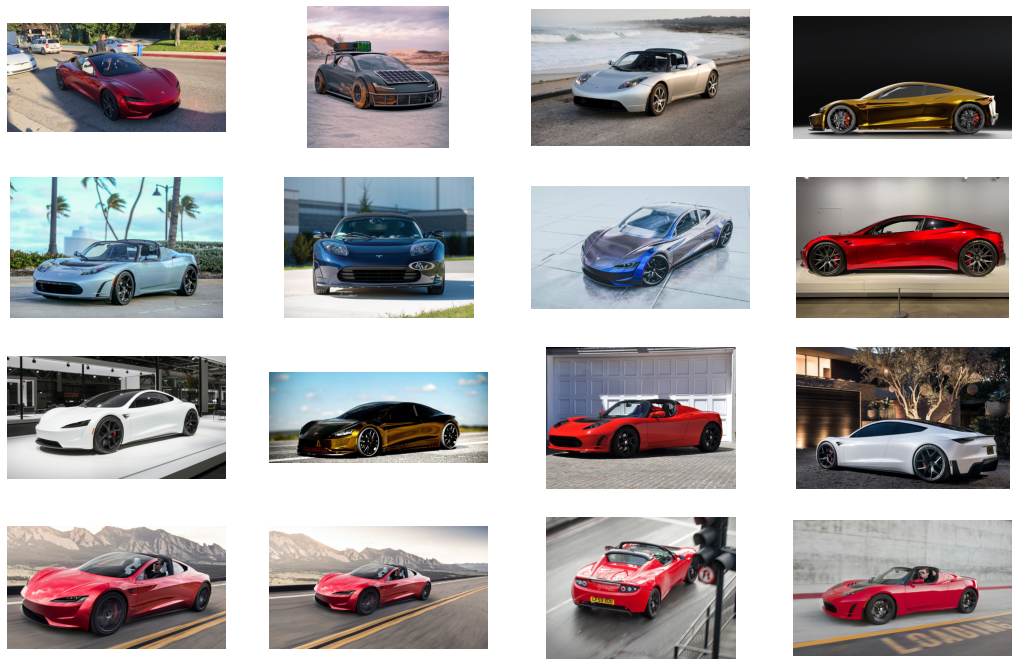

In [ ]:
f, axes = plt.subplots(4, 4, figsize=(18,12))
axes = axes.flatten()
ax_i = 0
img_i = 0
while ax_i < len(axes) and img_i < len(urls_tesla):
  try:
    url = urls_tesla[img_i]
    print(f'{img_i}: {url}')
    image_data = requests.get(url)
    image_data.raise_for_status()
    
    image = Image.open(BytesIO(image_data.content)) 
    axes[ax_i].imshow(image)
    axes[ax_i].axis("off")
    ax_i += 1 # next axis
  except requests.exceptions.RequestException as e:
    print(e)
  finally:
    img_i += 1 # next image, especially when exception occured

      
plt.show()

### 2.2 Get images for the two classes
Download 150 images of each class. Save images to Google drive.  
Remove any corrupt images using `verify_images()`.

In [ ]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path.ls()

(#2) [Path('/content/gdrive/MyDrive/Colab Notebooks/lotus_roadster_ddg_23'),Path('/content/gdrive/MyDrive/Colab Notebooks/lotus_tesla_ddg_23')]

In [ ]:
cars = 'lotus','roadster'
common_path = export_path/'lotus_tesla_ddg_23'
common_path.mkdir(exist_ok=True)

In [ ]:
path = common_path/'lotus'
if not path.exists():
    dest = path
    dest.mkdir(exist_ok=True)
    results = search_images_ddg('lotus elise')
    download_images(dest, urls=results)

In [ ]:
path = common_path/'roadster'
if not path.exists():
    dest = path
    dest.mkdir(exist_ok=True)
    results = search_images_ddg('roadster', max_images=150)
    download_images(dest, urls=results)

In [ ]:
fns = get_image_files(common_path)
failed = verify_images(fns)
failed.map(Path.unlink)

(#0) []

## 3. Setup image loaders
Setup image loaders, use 20% of images for validation, and show one batch for each training and validation dataset.

In [ ]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #image->discrete category
    get_items=get_image_files, # path->images
    splitter=RandomSplitter(valid_pct=0.2, seed=844), #how to train-valid split
    get_y=parent_label, # get the label from the directory name
    item_tfms=Resize(128)) # resize to 128x128

In [ ]:
dls = cars.dataloaders(common_path)

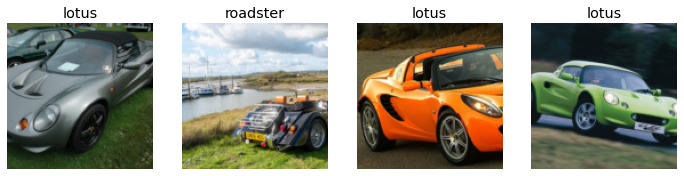

In [ ]:
dls.train.show_batch(max_n=4, nrows=1)

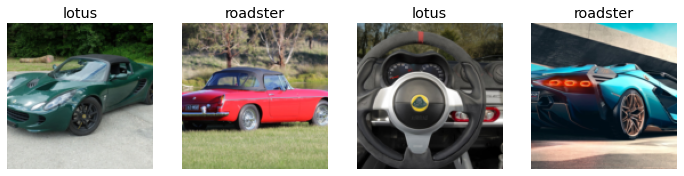

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

**Question 1:** How many images of each class are in training and validation sets?

*The following code shows that there are 128 lotus images and 116 tesla roadster images in the training set. In the validation set there is 36 images of the lotus elise and 24 tesla roadster images.*

In [ ]:
lotus = 0
roadster = 0
for name in dls.train.items:
    name_split = str(name).split('/')
    if name_split[6] == 'lotus':
      lotus += 1
    if name_split[6] == 'roadster':
      roadster += 1

print(f'There are {lotus} images of lotus and {roadster} images of the tesla roadster in the training set.')

There are 128 images of lotus and 116 images of the tesla roadster in the training set.


In [ ]:
lotus = 0
roadster = 0
for name in dls.valid.items:
    name_split = str(name).split('/')
    if name_split[6] == 'lotus':
      lotus += 1
    if name_split[6] == 'roadster':
      roadster += 1

print(f'There are {lotus} images of lotus and {roadster} images of the tesla roadster in the validation set.')

There are 36 images of lotus and 24 images of the tesla roadster in the validation set.


## 4. Setup vision learner
Setup a vision learner with the dataloaders, `resnet18` architecture and `error_rate` as metric.

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## 5. Train binary classifier
Fine tune for 10 epochs and show results.

In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.091001,0.680881,0.233333,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.722771,0.549718,0.250000,00:17
1,0.630878,0.468968,0.200000,00:17
2,0.602520,0.517532,0.283333,00:17
3,0.535374,0.514060,0.233333,00:17
4,0.466208,0.518907,0.183333,00:20
5,0.403882,0.532775,0.183333,00:16
6,0.362759,0.540319,0.183333,00:17
7,0.332847,0.542070,0.166667,00:17
8,0.299517,0.551688,0.183333,00:17
9,0.271156,0.552633,0.183333,00:18


**Question 2:** Is the model overfitting? Why, why not?

*The model is overfitting, this is shown with high bias and diminshing returns in the valid loss column. After the 3rd epoch the training set has less and less loss, but the validation set loss grows.*

## 6. Analyze results

Plot confusion matrix.

Plot top 5 losses.


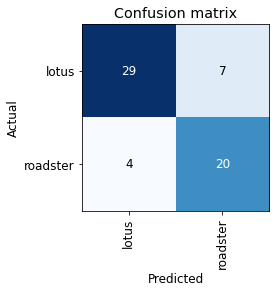

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

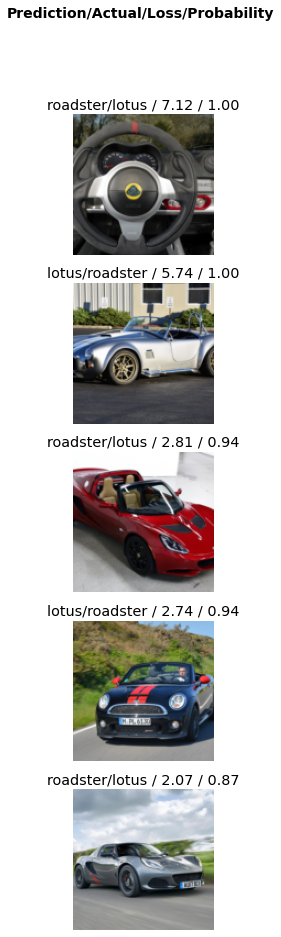

In [ ]:
interp.plot_top_losses(5, nrows=5)

**Question 3:** How many false positive, false negative errors?

*4 false positives (lotus predicted roadster) and 7 false negatives (roadster predicted lotus)*

## 7. Summary and Conclusion

Summarize:
- Type of classifier trained.
- Number of images of each class in the training validation sets
- Error rate achieved

*In this assignment I trained an image classifier to detect whether the DuckDuckGo image provided was a Lotus Elise or Tesla Roadster. 
The number of images in the training set was 244 and the number of images in the validation set was 60. The best error rate achieved was 16% but at 10 epochs the end result was 18%.*

Conclusion:
- Are there any problems with data/labeling?
- Are you satisfied with model performance? Why, why not?

*Yes there were issues with the data and labelling it. From the top 5 losses it is evident that there is a Mini Cooper that was labelled as a Tesla Roadster! Overall I am quite satisfied with the image classifier, as the original Tesla Roadster was based directly off the Lotus Elise, so it is a challenge to tell the difference for a normal person.*


## 8. Reflection
Include a sentence or two about 
- what you liked or disliked, 
- found interesting, confusing, challangeing, motivating 

while working on this assignment.

*I like working with larger datasets and being able to reference back to the lectures but having to adjust the code, as it helps me better understand the course material, but makes sure I can still follow along. I found it confusing originally looking through the bears code where the DuckDuckGo images were found for three types of bears, this was because I did not properly read the code and see that "{o}" was just a place holder for the type of bear. I was confused on why my results were so skewed. I enjoyed this assignment quite a bit overall.*